# Библиотеки

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

/home/vrtx26/.local/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [1]:
# run this function if you need to generate a csv data set from scratch
# X, y, ID = data_loader.load_dataset(should_generate_dataset=True, 
#                                     use_vad=False, 
#                                     use_delta_mfcc=False,
#                                     use_delta_delta_mfcc=True)

In [4]:
X, y, ID = data_loader.load_dataset(X_path='data/feature_mfcc_delta_delta_nfft_8192.csv', 
                                    y_path='data/y_labels_feature_mfcc_delta_nfft_8192.csv', 
                                    ID_path='data/IDs_feature_mfcc_delta_nfft_8192.csv')

data loaded in 0.08894062042236328ms
          0         1         2         3         4         5         6  \
0  0.345202 -0.433601 -0.578419 -1.323836 -0.680025 -0.028385 -1.330347   
1 -0.472124 -0.498498  0.112059 -0.830823 -0.133227 -0.049598 -0.812726   
2 -0.848489  0.494677 -0.151049 -0.482602 -0.010413  1.085948 -0.164157   
3  0.868686 -1.375276 -0.092567 -1.910069 -0.239241 -0.146946 -1.297258   
4  0.508706 -1.448286 -0.742764 -1.639593 -0.543989 -0.377626 -1.206869   

          7         8         9  ...       350       351       352       353  \
0 -1.074133 -1.305603  0.427557  ... -0.281964 -0.725944 -0.433156  0.210156   
1 -0.462068 -0.835043  0.066239  ...  0.341908  0.228646 -0.123230 -0.204409   
2 -0.486912 -0.812179  0.508496  ... -0.690133  0.731920  1.296045  1.388650   
3 -0.738021 -1.705054 -0.068063  ... -0.913426 -0.365619  1.479341 -0.355389   
4 -0.206688 -1.029338  0.273764  ... -0.282219 -0.935296  0.026856 -0.419878   

        354       355       356

In [5]:
ID['0'].unique()    # actors

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Columns: 360 entries, 0 to 359
dtypes: float64(360)
memory usage: 4.0 MB


In [7]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


## SVM with RBF kernel

In [8]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.352
C = 0.100000, gamma = 0.000316


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.366
C = 0.100000, gamma = 0.000527


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.376
C = 0.100000, gamma = 0.000880


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.382
C = 0.100000, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.387
C = 0.100000, gamma = 0.002448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.354


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.309


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.212


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.136


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.129


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.368


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.382


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.395
C = 0.187382, gamma = 0.000880


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.407
C = 0.187382, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.405


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.391


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.309


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.212


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.136


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.129


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.389


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.404


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.416
C = 0.351119, gamma = 0.000880


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.428
C = 0.351119, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.429
C = 0.351119, gamma = 0.002448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.411


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.363


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.214


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.136


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.129


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.415


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.428


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.438
C = 0.657933, gamma = 0.000880


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.438


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.438


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.431


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.398


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.277


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.140


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.129


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.06it/s]

UAR = 0.436


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.444
C = 1.232847, gamma = 0.000527


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.452
C = 1.232847, gamma = 0.000880


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.465
C = 1.232847, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.459


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.423


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.369


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.243


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.43it/s]

UAR = 0.165


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.30it/s]

UAR = 0.452


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.26it/s]

UAR = 0.467
C = 2.310130, gamma = 0.000527


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.475
C = 2.310130, gamma = 0.000880


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.488
C = 2.310130, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.471


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.450


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.432


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.370


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.243


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.60it/s]

UAR = 0.165


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.41it/s]

UAR = 0.471


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.41it/s]

UAR = 0.480


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.491
C = 4.328761, gamma = 0.000880


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.485


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.467


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.432


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.370


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.243


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.89it/s]

UAR = 0.165


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.39it/s]

UAR = 0.484


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.15it/s]

UAR = 0.490


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.486


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.483


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.432


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.370


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.243


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.90it/s]

UAR = 0.165


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.68it/s]

UAR = 0.485


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.05it/s]

UAR = 0.486


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.477


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.479


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.432


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.370


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.243


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.93it/s]

UAR = 0.165


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.58it/s]

UAR = 0.473


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.19it/s]

UAR = 0.470


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.476


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.479


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.432


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.370


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.243


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.03it/s]

UAR = 0.165


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.27it/s]

UAR = 0.469


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.473


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.475


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.479


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.432


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.370


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.243


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.72it/s]

UAR = 0.165


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.05it/s]

UAR = 0.460


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.476


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.475


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.479


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.432


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.370


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.243


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.51it/s]

UAR = 0.165
UAR_best = 0.491, C_best = 4.328761, gamma_best = 0.000880


## Result visualization

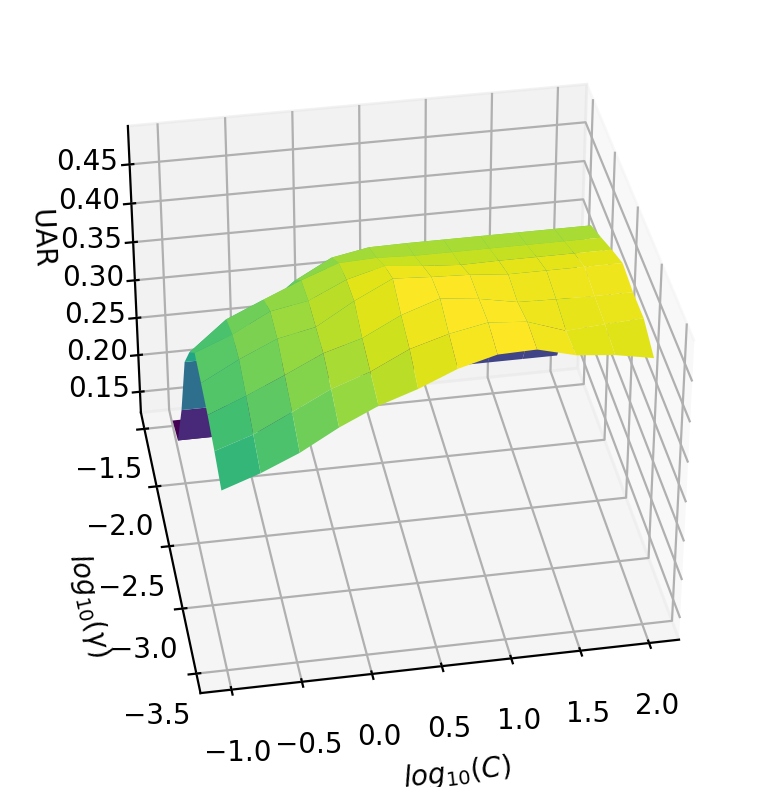

In [9]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
# ax.set_title('UAR')
ax.set_zlabel('$\mathrm{UAR}$')
ax.view_init(35, 260)
# plt.show()
# image_path = "Doc/figures/UAR_svm_rbf_4096.jpg"
# fig.savefig(image_path, format='jpg', dpi=200, bbox_inches='tight', pad_inches=0.2)

## Results and confusion matrix

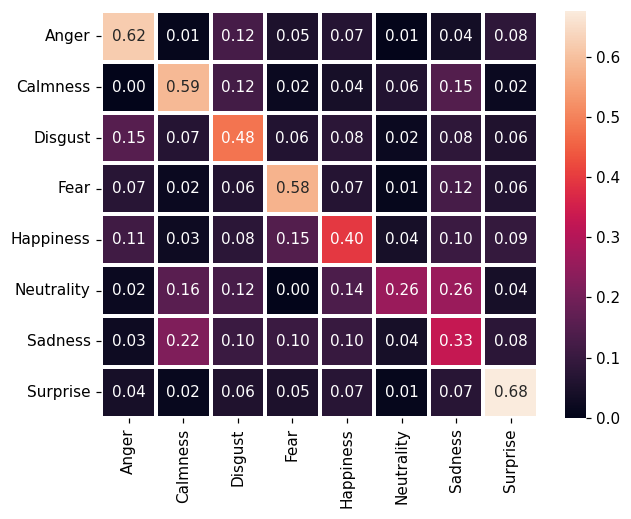

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [10]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)